In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../testlizenz-tuebingen-dataliteracy4students_1700939273256.csv", sep=";", encoding='unicode_escape', decimal=",")


## Heatmap
Um die Korrelationen zwischen den Parametern zuerkennen, haben wir eine Heatmap erstellt.
Es werden nur die Parameter betrachtet, die eine Zahl als Datentyp haben (int64 und float64).

Problem: Haben trotzdem noch 71 Parameter. Das passt nicht in eine Heatmap bzw. Heatmap ist zu groß.
--> müssen Parameter die eh nicht so wichtig sind 'rausschmeißen' 

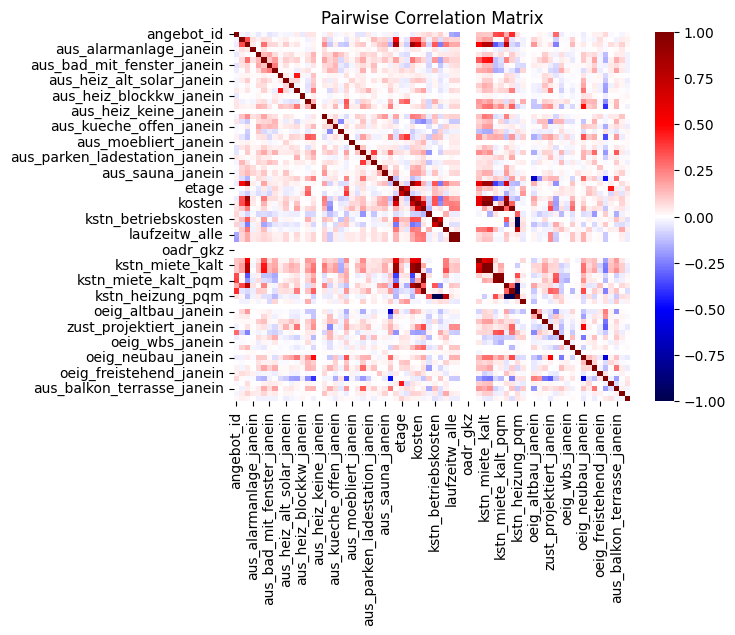

In [5]:

def remove_non_number_types(df):
    df_copy = pd.DataFrame()
    for col in df.columns:
        allowed= ["int64", "float64"]
        if str(df[col].dtype) in allowed:
            df_copy[col] = df[col]
    return df_copy

df_copy = remove_non_number_types(df)
#df_copy.info(verbose=True)
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, cmap="seismic")
plt.title('Pairwise Correlation Matrix')
plt.show()

# for column in  df_copy.columns:
#     for other_column in df_copy.columns:
#         index = pd.notna(df_copy[column]) & pd.notna(df_copy[other_column])
#         correlation = df_copy[column][index].corr(df_copy[other_column][index])

#         print(f"Correlation between {column} and {other_column}: {correlation}")



# sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Pairwise Correlation Matrix')
# plt.show()


#correlation_matrix = df_no_na.corr()





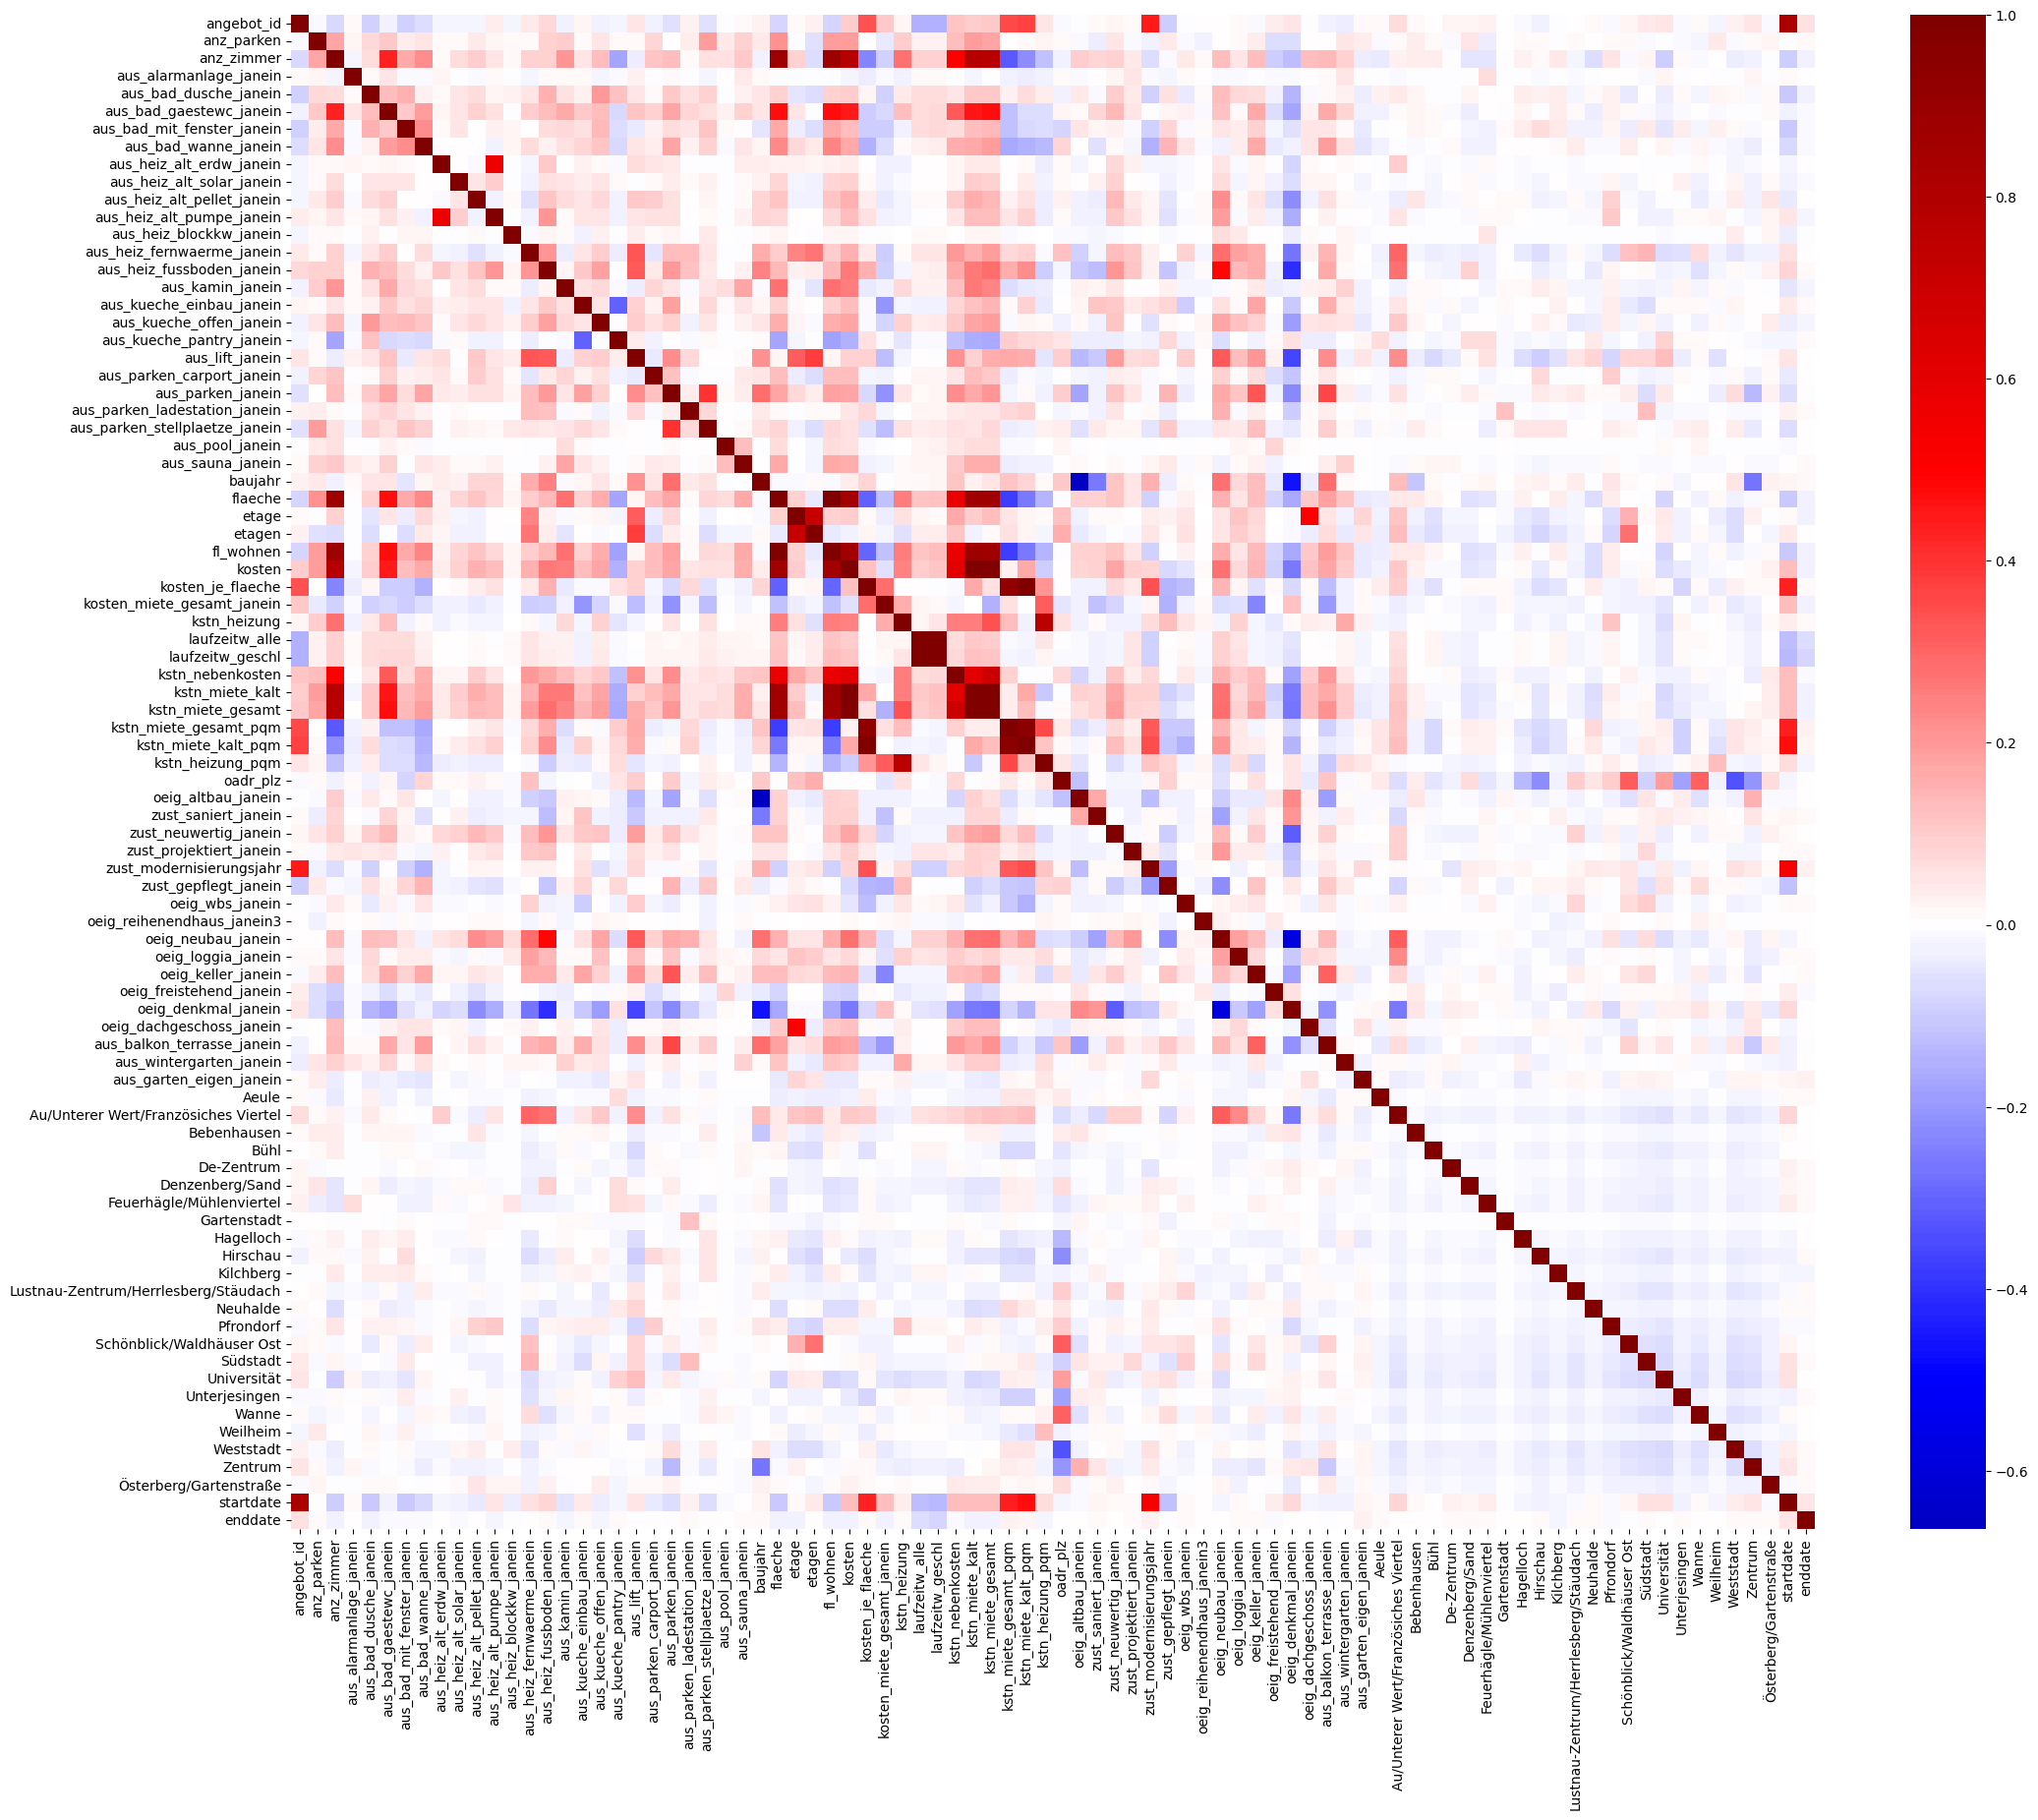

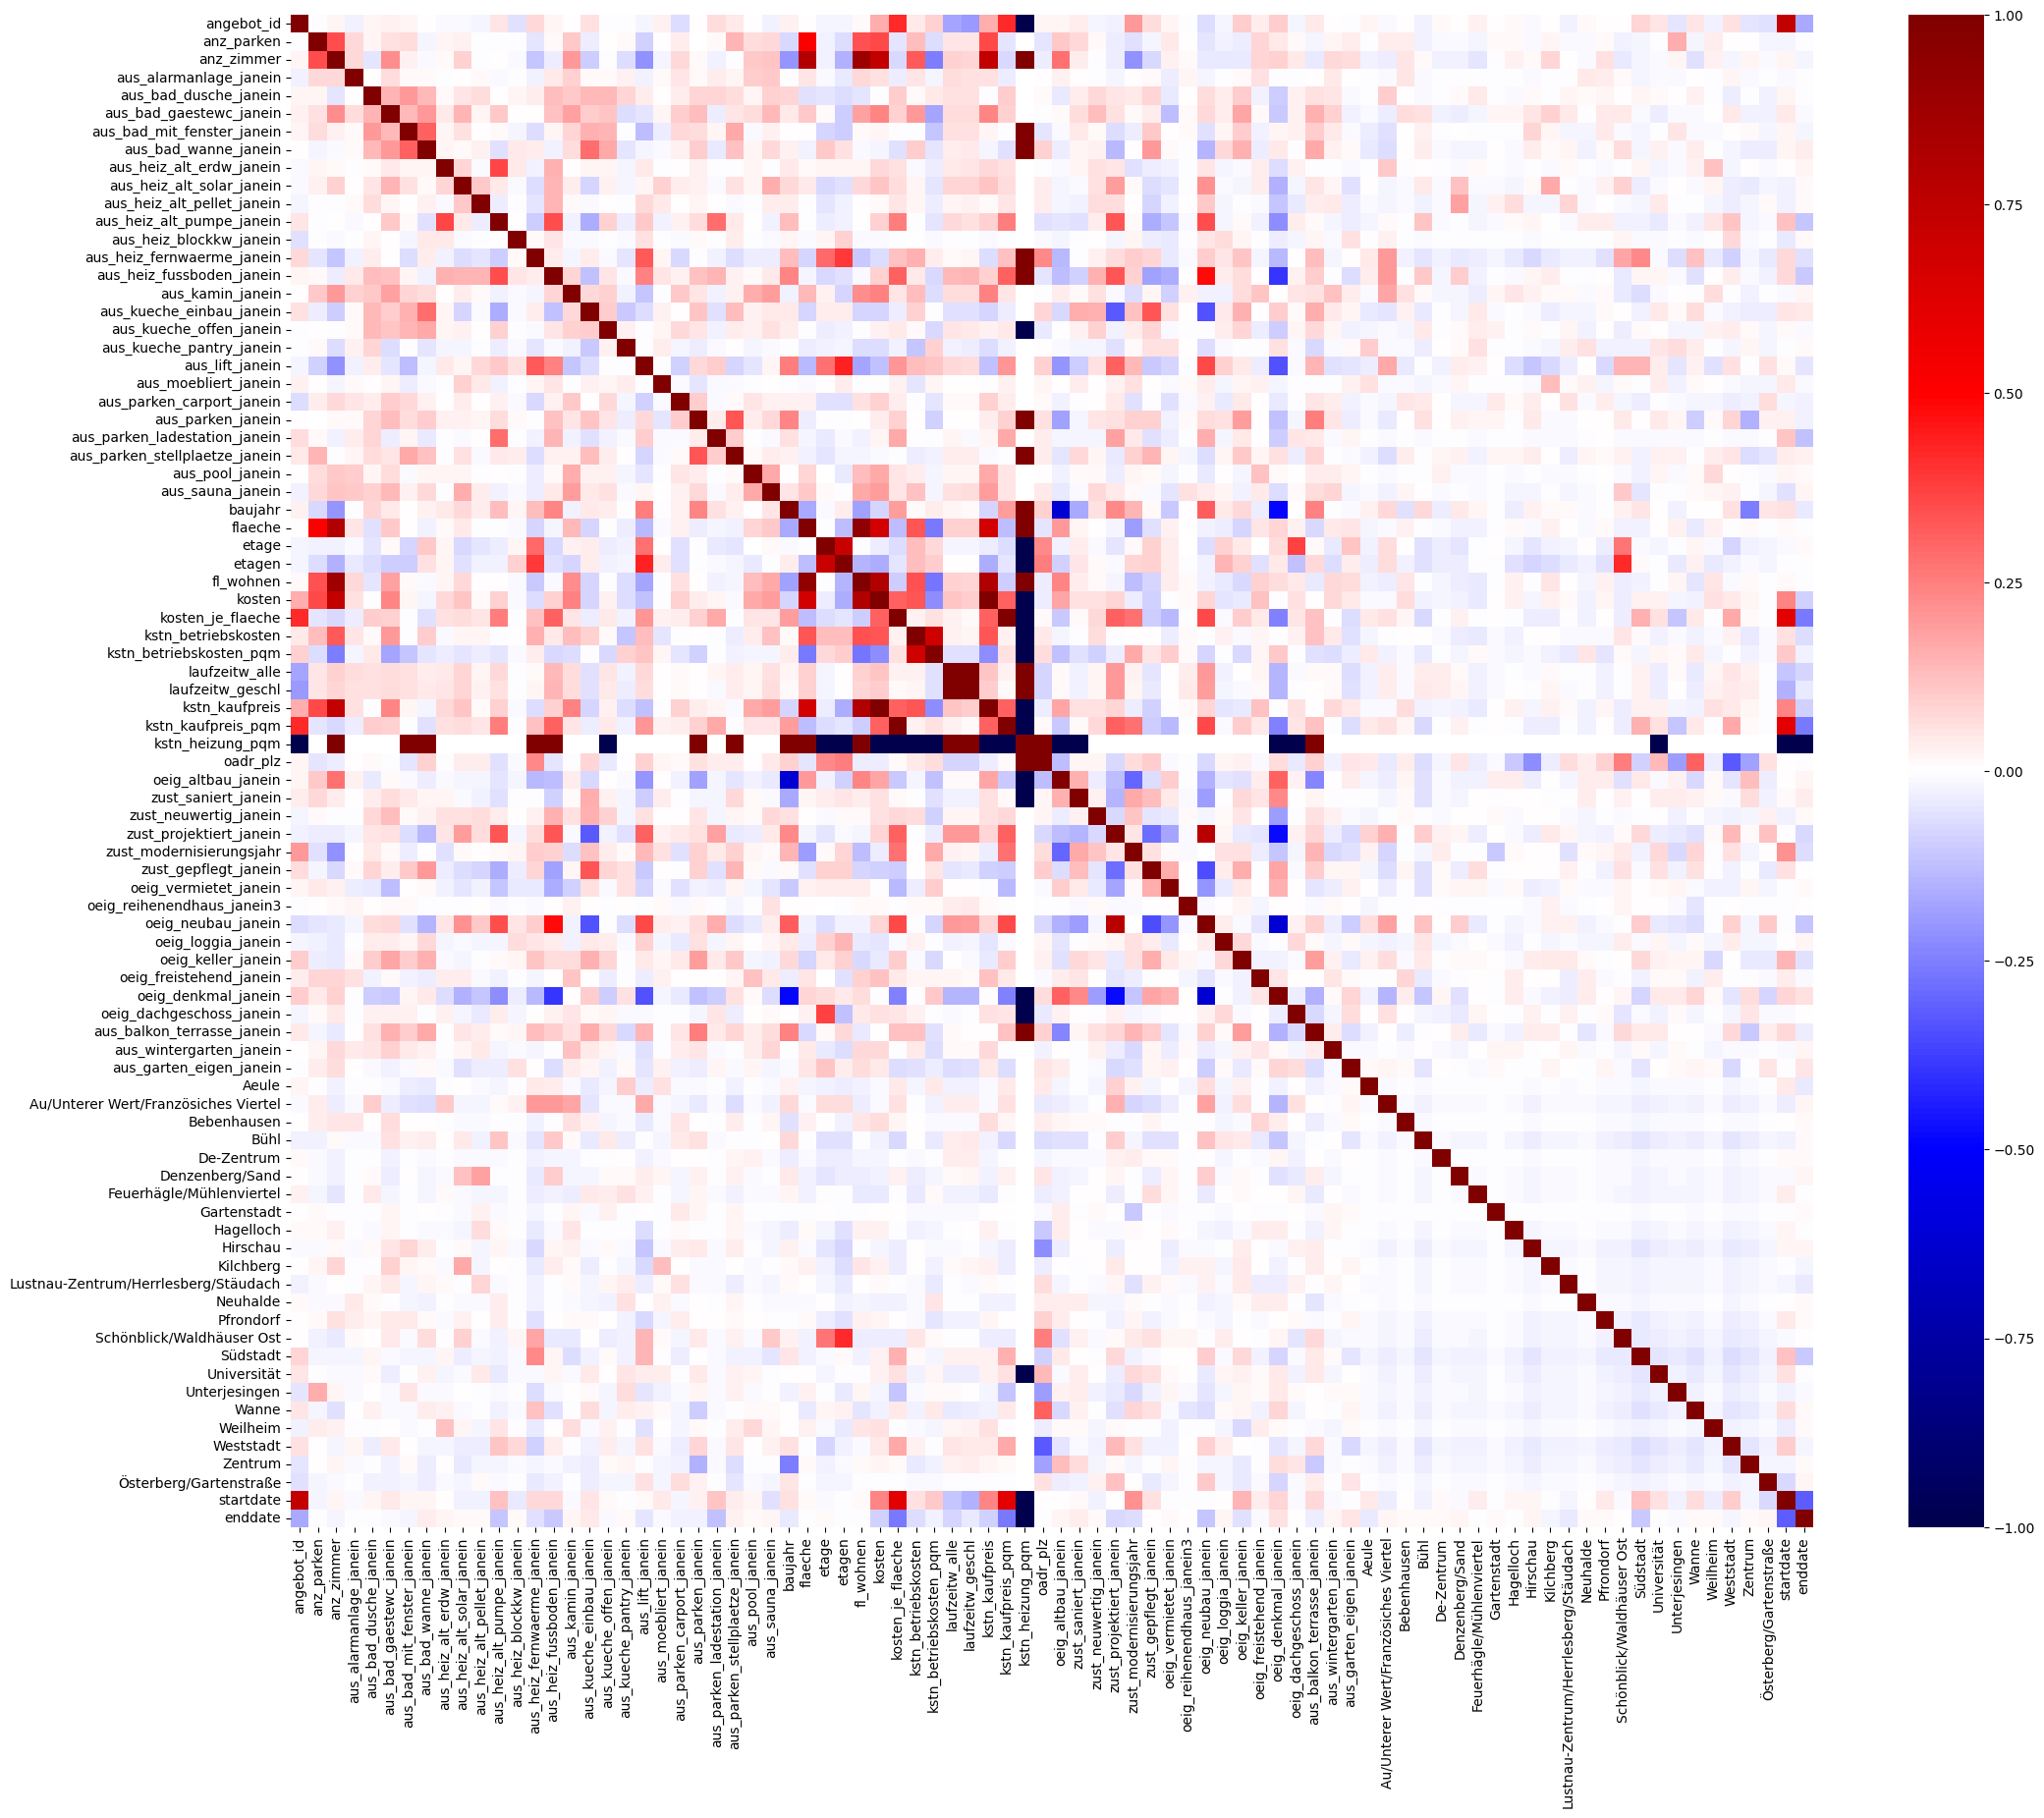

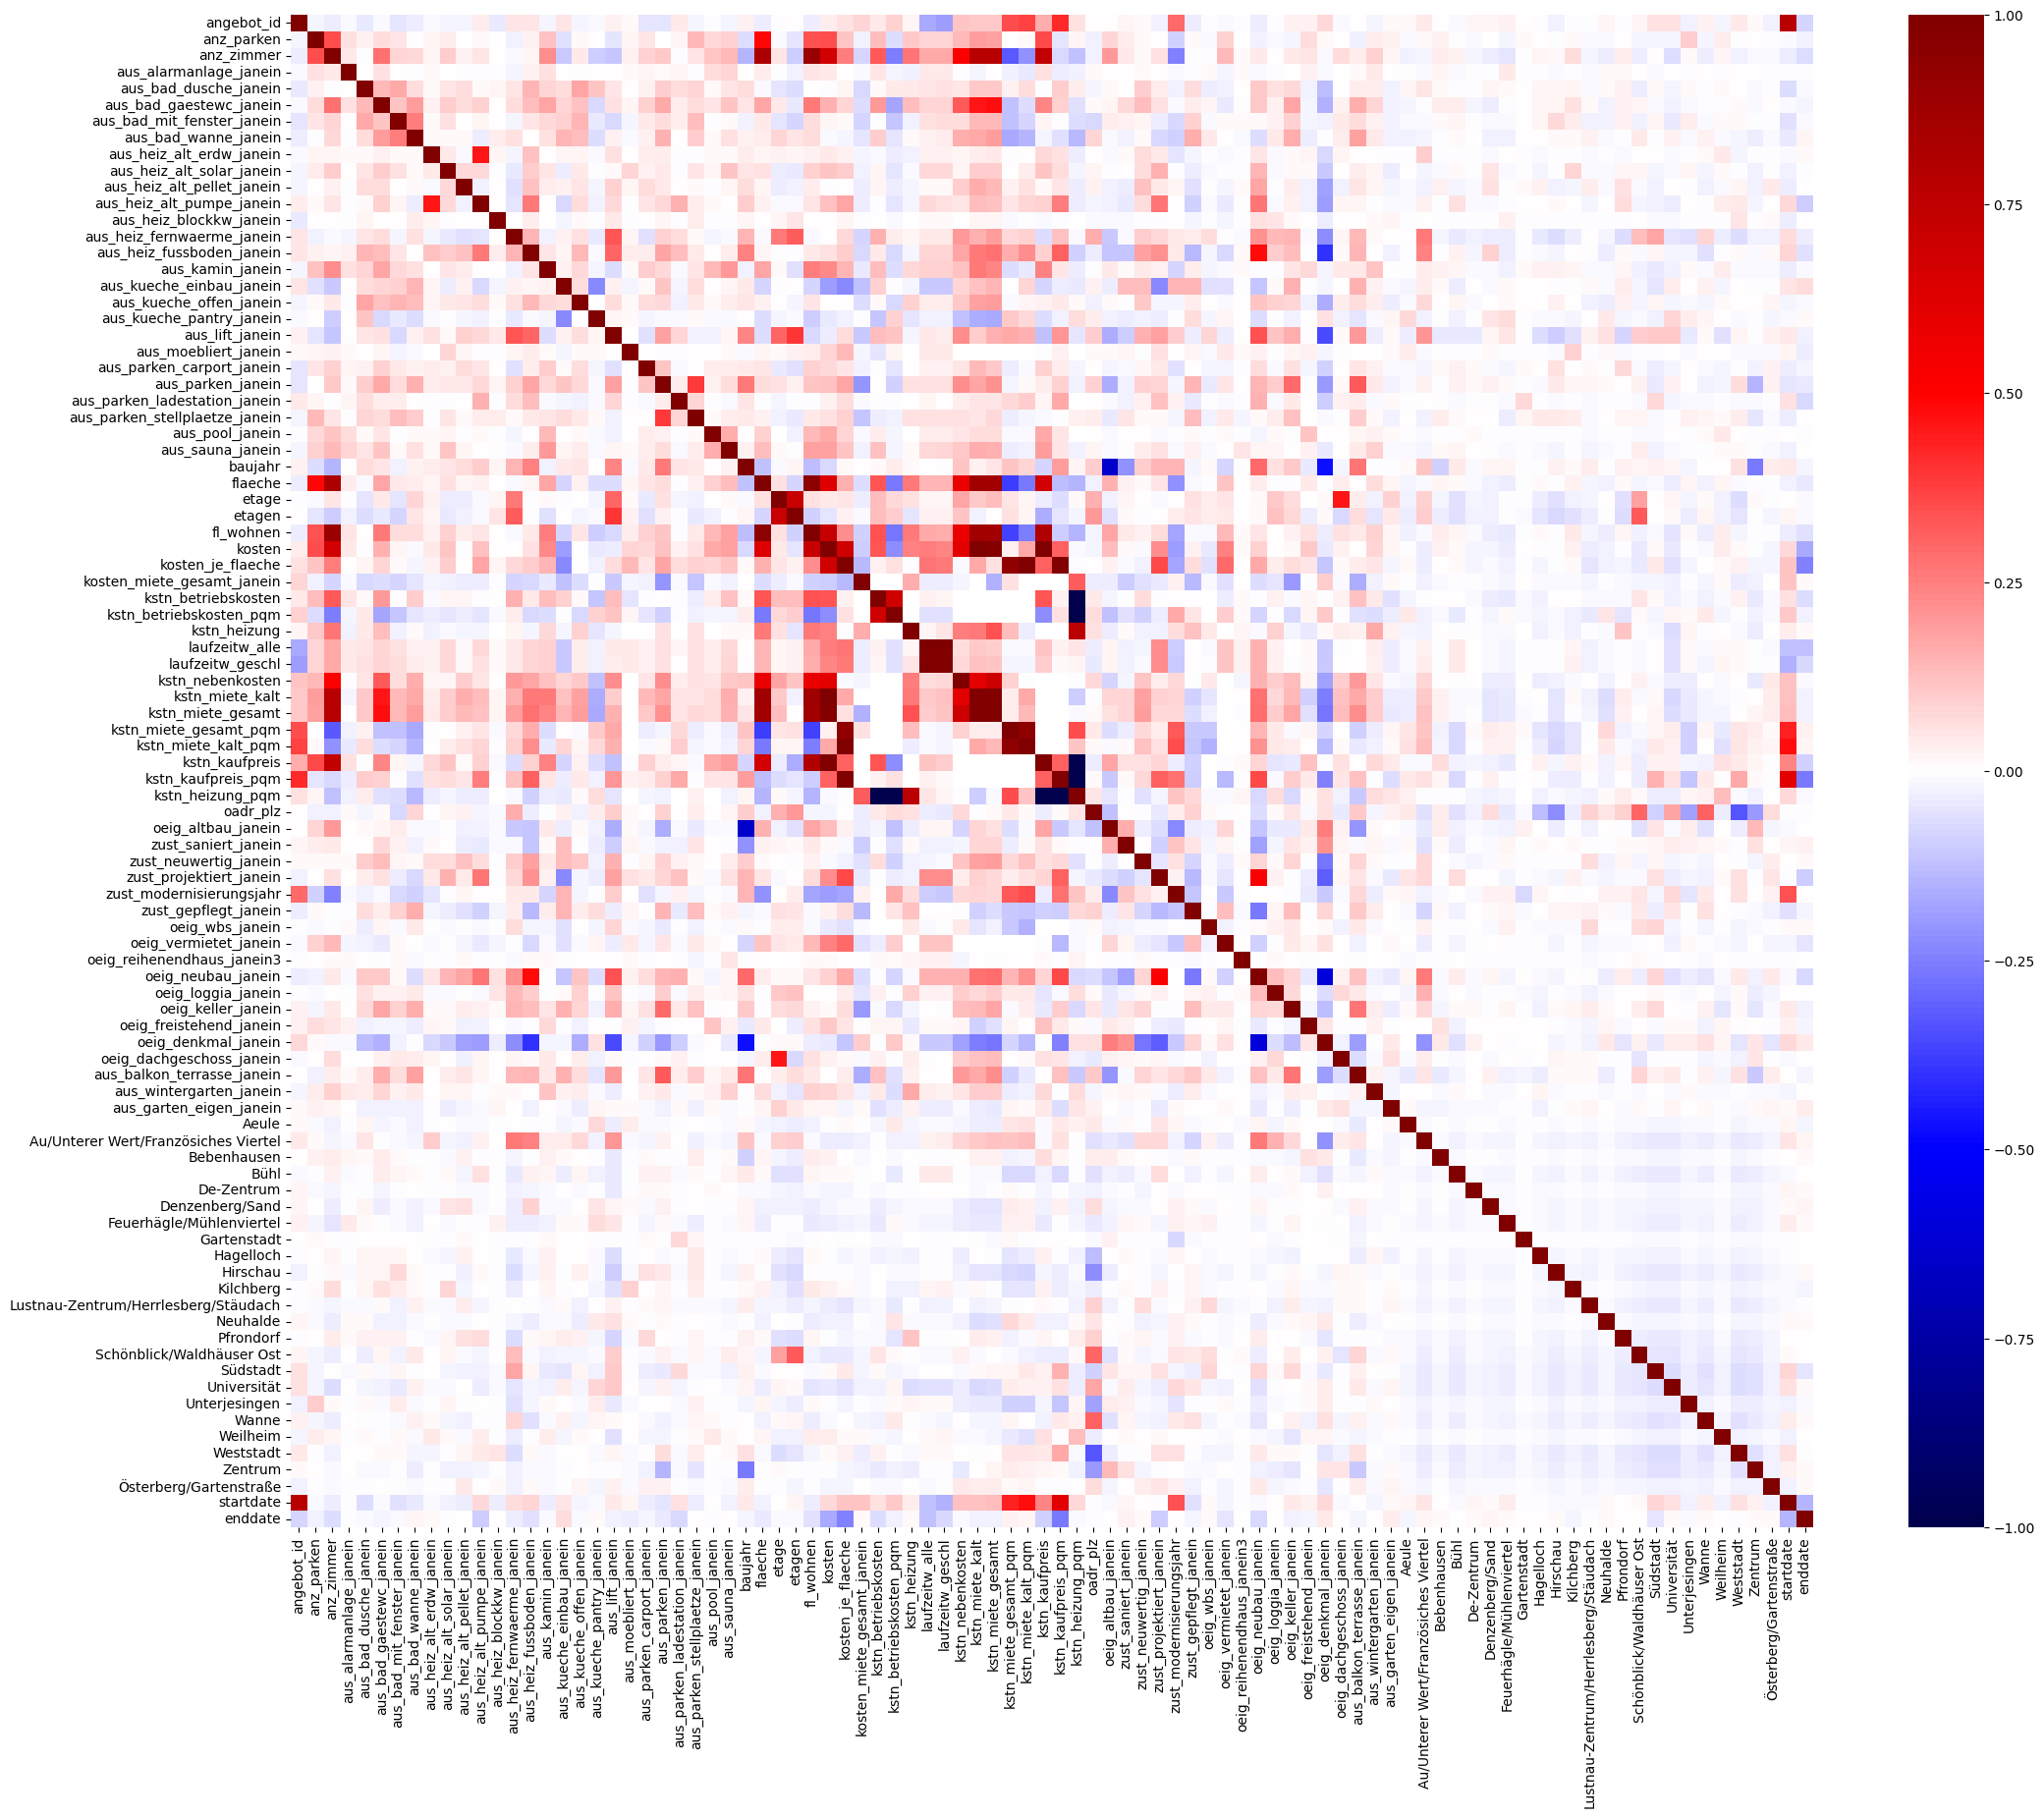

In [44]:
def plot_corr_matrix(dfg):
    df_num = dfg.select_dtypes('number')
    # df_num = pd.concat([df_num, pd.get_dummies(dfg["oadr_u1"])],axis=1)
    df_num = pd.concat([df_num, pd.get_dummies(dfg["oadr_u2"])], axis=1)
    df_num["startdate"] = pd.to_numeric(pd.to_datetime(dfg["startdate"]))
    df_num["enddate"] = pd.to_numeric(pd.to_datetime(dfg["enddate"]))
    corr = df_num.corr()
    corr_na_col_missing = corr.dropna(axis=1, how='all')
    corr_na_missing = corr_na_col_missing.dropna(how='all')

    plt.subplots(figsize=(25, 20))
    sns.heatmap(corr_na_missing, cmap='seismic', center=0.0)
#df_num.info(verbose=True)

plot_corr_matrix(df[df["nachfrageart"] == "miete"])
plot_corr_matrix(df[df["nachfrageart"] == "kauf"])
plot_corr_matrix(df)

## Lineare Regression
Wir wollen den Verlauf der kalt Miete pro qm über die Zeit analysieren für jeden Stadteil.
Haben dafür erstmal einen Scatterplot erstellt.
Danach haben wir noch lineare regression ergänzt.

Problem: Auf der x-Achse haben wir eine Zeitreihe --> keine unabhängigen Variablen, was eine Vorraussetzun bei lineare Regression ist

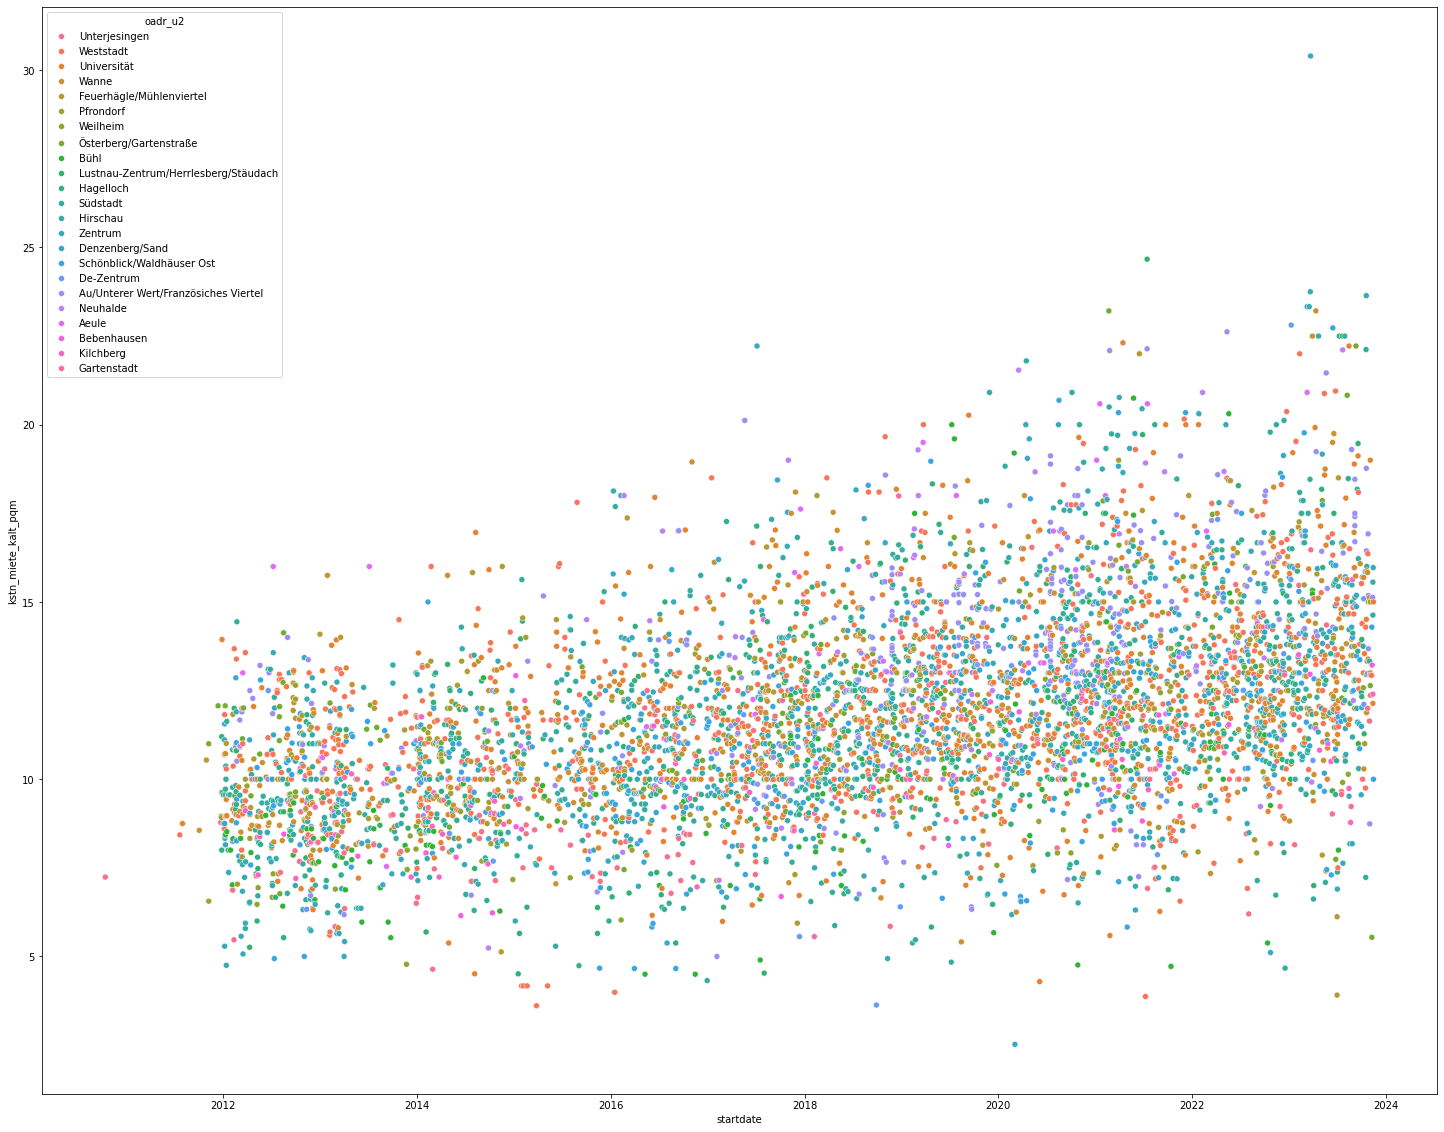

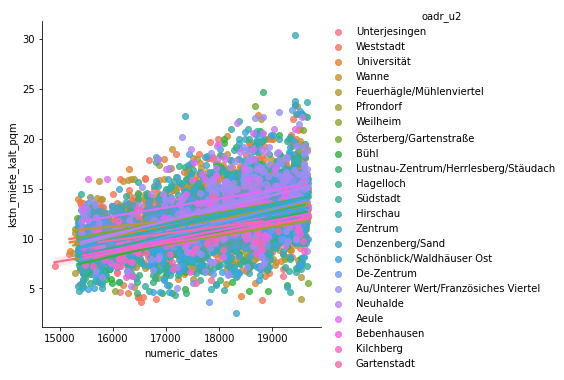

In [114]:
import datetime
from matplotlib.dates import date2num

df['kstn_miete_kalt_pqm'].dropna(inplace=True)
oadr_u2 = df["oadr_u2"].unique().tolist()

df['startdate'] = pd.to_datetime(df['startdate'])
df = df.sort_values(by='startdate')
#[datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in df['startdate']]

#scatterplot
plt.subplots(figsize=(25, 20))
scatter_plot = sns.scatterplot(data=df, x="startdate", y="kstn_miete_kalt_pqm", hue="oadr_u2")

#liner regression
numeric_dates = date2num(df['startdate'])
df['numeric_dates'] = numeric_dates
lin_reg = sns.lmplot(x="numeric_dates", y="kstn_miete_kalt_pqm", hue="oadr_u2", data=df)



In [120]:
df['kstn_miete_kalt_pqm'].dropna()
x = df['startdate']
y = df["kstn_miete_kalt_pqm"]

#model = LinearRegression().fit(x, y)

<bound method IndexOpsMixin.transpose of 10573     7.24
10572     7.93
10571     8.43
10570     9.69
10569     8.75
         ...  
4        15.56
3        15.97
2        10.00
1        15.00
0          NaN
Name: kstn_miete_kalt_pqm, Length: 10574, dtype: float64>

## In welchen Monaten werden am meisten Wohnungen online gestellt?

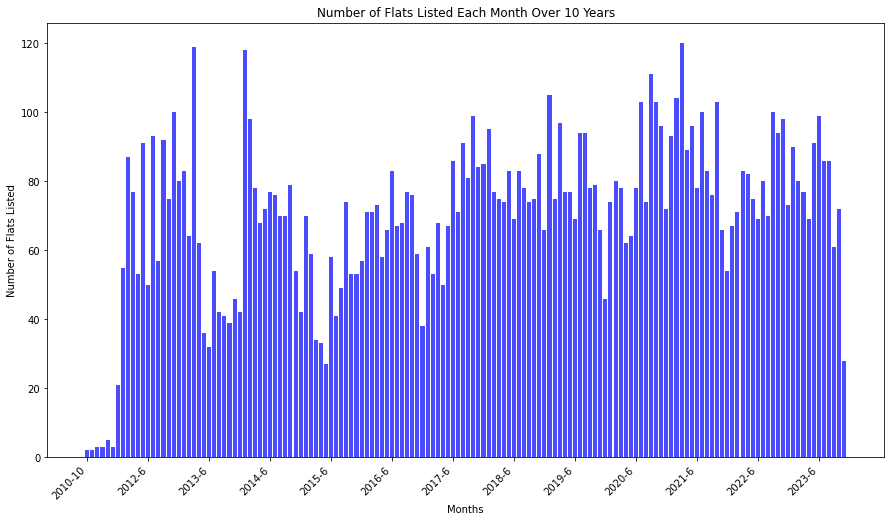

In [149]:
df['year'] = df['startdate'].str[:4]
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

plt.figure(figsize=(15, 8))
plt.bar(monthly_counts.index, monthly_counts['count'], color='blue', alpha=0.7)

plt.title('Number of Flats Listed Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Number of Flats Listed')

tick_positions = monthly_counts.index[::12]
tick_labels = [f"{year}-{month}" for year, month in zip(monthly_counts['year'][tick_positions], monthly_counts['month'][tick_positions])]
plt.xticks(tick_positions, tick_labels, ha='right')

plt.show()

#kde=True
# sns.histplot(data=df, x="startdate",bins=12)
# plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])



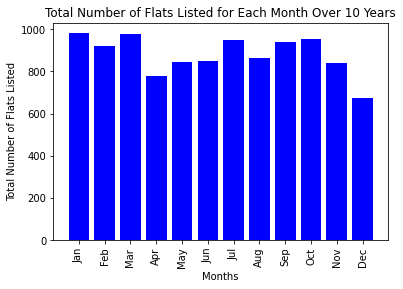

In [159]:
df['year'] = df['startdate'].str[:4]
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

#plt.figure(figsize=(15, 8))
plt.bar(monthly_counts_summed['month'], monthly_counts_summed['total_count'], color='blue')

plt.title('Total Number of Flats Listed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats Listed')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_counts_summed['month'], month_names, rotation='vertical')

plt.show()

## In welchen Monaten werden Inserate am öftesten rausgenommen?

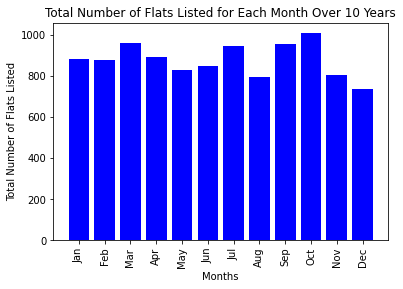

In [158]:
df['year'] = df['enddate'].str[:4]
df["month"] = pd.DatetimeIndex(df['enddate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

#plt.figure(figsize=(15, 8))
plt.bar(monthly_counts_summed['month'], monthly_counts_summed['total_count'], color='blue')

plt.title('Total Number of Flats Listed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats Listed')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_counts_summed['month'], month_names, rotation='vertical')

plt.show()

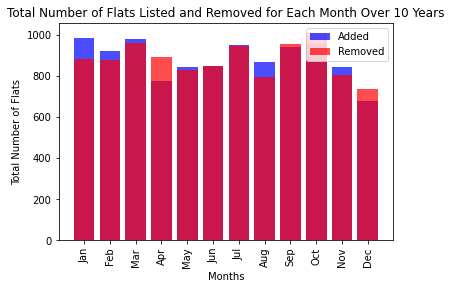

In [157]:
df['year'] = df['startdate'].str[:4]
df["month"] = pd.DatetimeIndex(df['startdate']).month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')
monthly_counts_summed = monthly_counts.groupby('month')['count'].sum().reset_index(name='total_count')

df['year_removed'] = df['enddate'].str[:4]
df["month_removed"] = pd.DatetimeIndex(df['enddate']).month
monthly_removed_counts = df.groupby(['year_removed', 'month_removed']).size().reset_index(name='removed_count')
monthly_removed_counts_summed = monthly_removed_counts.groupby('month_removed')['removed_count'].sum().reset_index(name='total_removed_count')

#plt.figure(figsize=(15, 8))
plt.bar(monthly_counts_summed['month'], monthly_counts_summed['total_count'], color='blue', alpha=0.7, label='Added')
plt.bar(monthly_removed_counts_summed['month_removed'], monthly_removed_counts_summed['total_removed_count'], color='red', alpha=0.7, label='Removed')

plt.title('Total Number of Flats Listed and Removed for Each Month Over 10 Years')
plt.xlabel('Months')
plt.ylabel('Total Number of Flats')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_counts_summed['month'], month_names, rotation='vertical')
plt.legend()
plt.show()

## Welche Inserate bleiben wie lange drin?

       startdate    enddate  duration_days
11    2023-11-13 2023-11-14              1
13    2023-11-13 2023-11-14              1
21    2023-11-10 2023-11-13              3
23    2023-11-09 2023-11-11              2
40    2023-11-05 2023-11-17             12
...          ...        ...            ...
16003 2010-10-15 2014-05-15           1308
16004 2010-10-15 2014-05-15           1308
16005 2010-07-26 2014-05-15           1389
16006 2009-10-06 2014-05-15           1682
16007 2009-09-10 2014-05-15           1708

[15707 rows x 3 columns]


<Axes: xlabel='duration_days', ylabel='Count'>

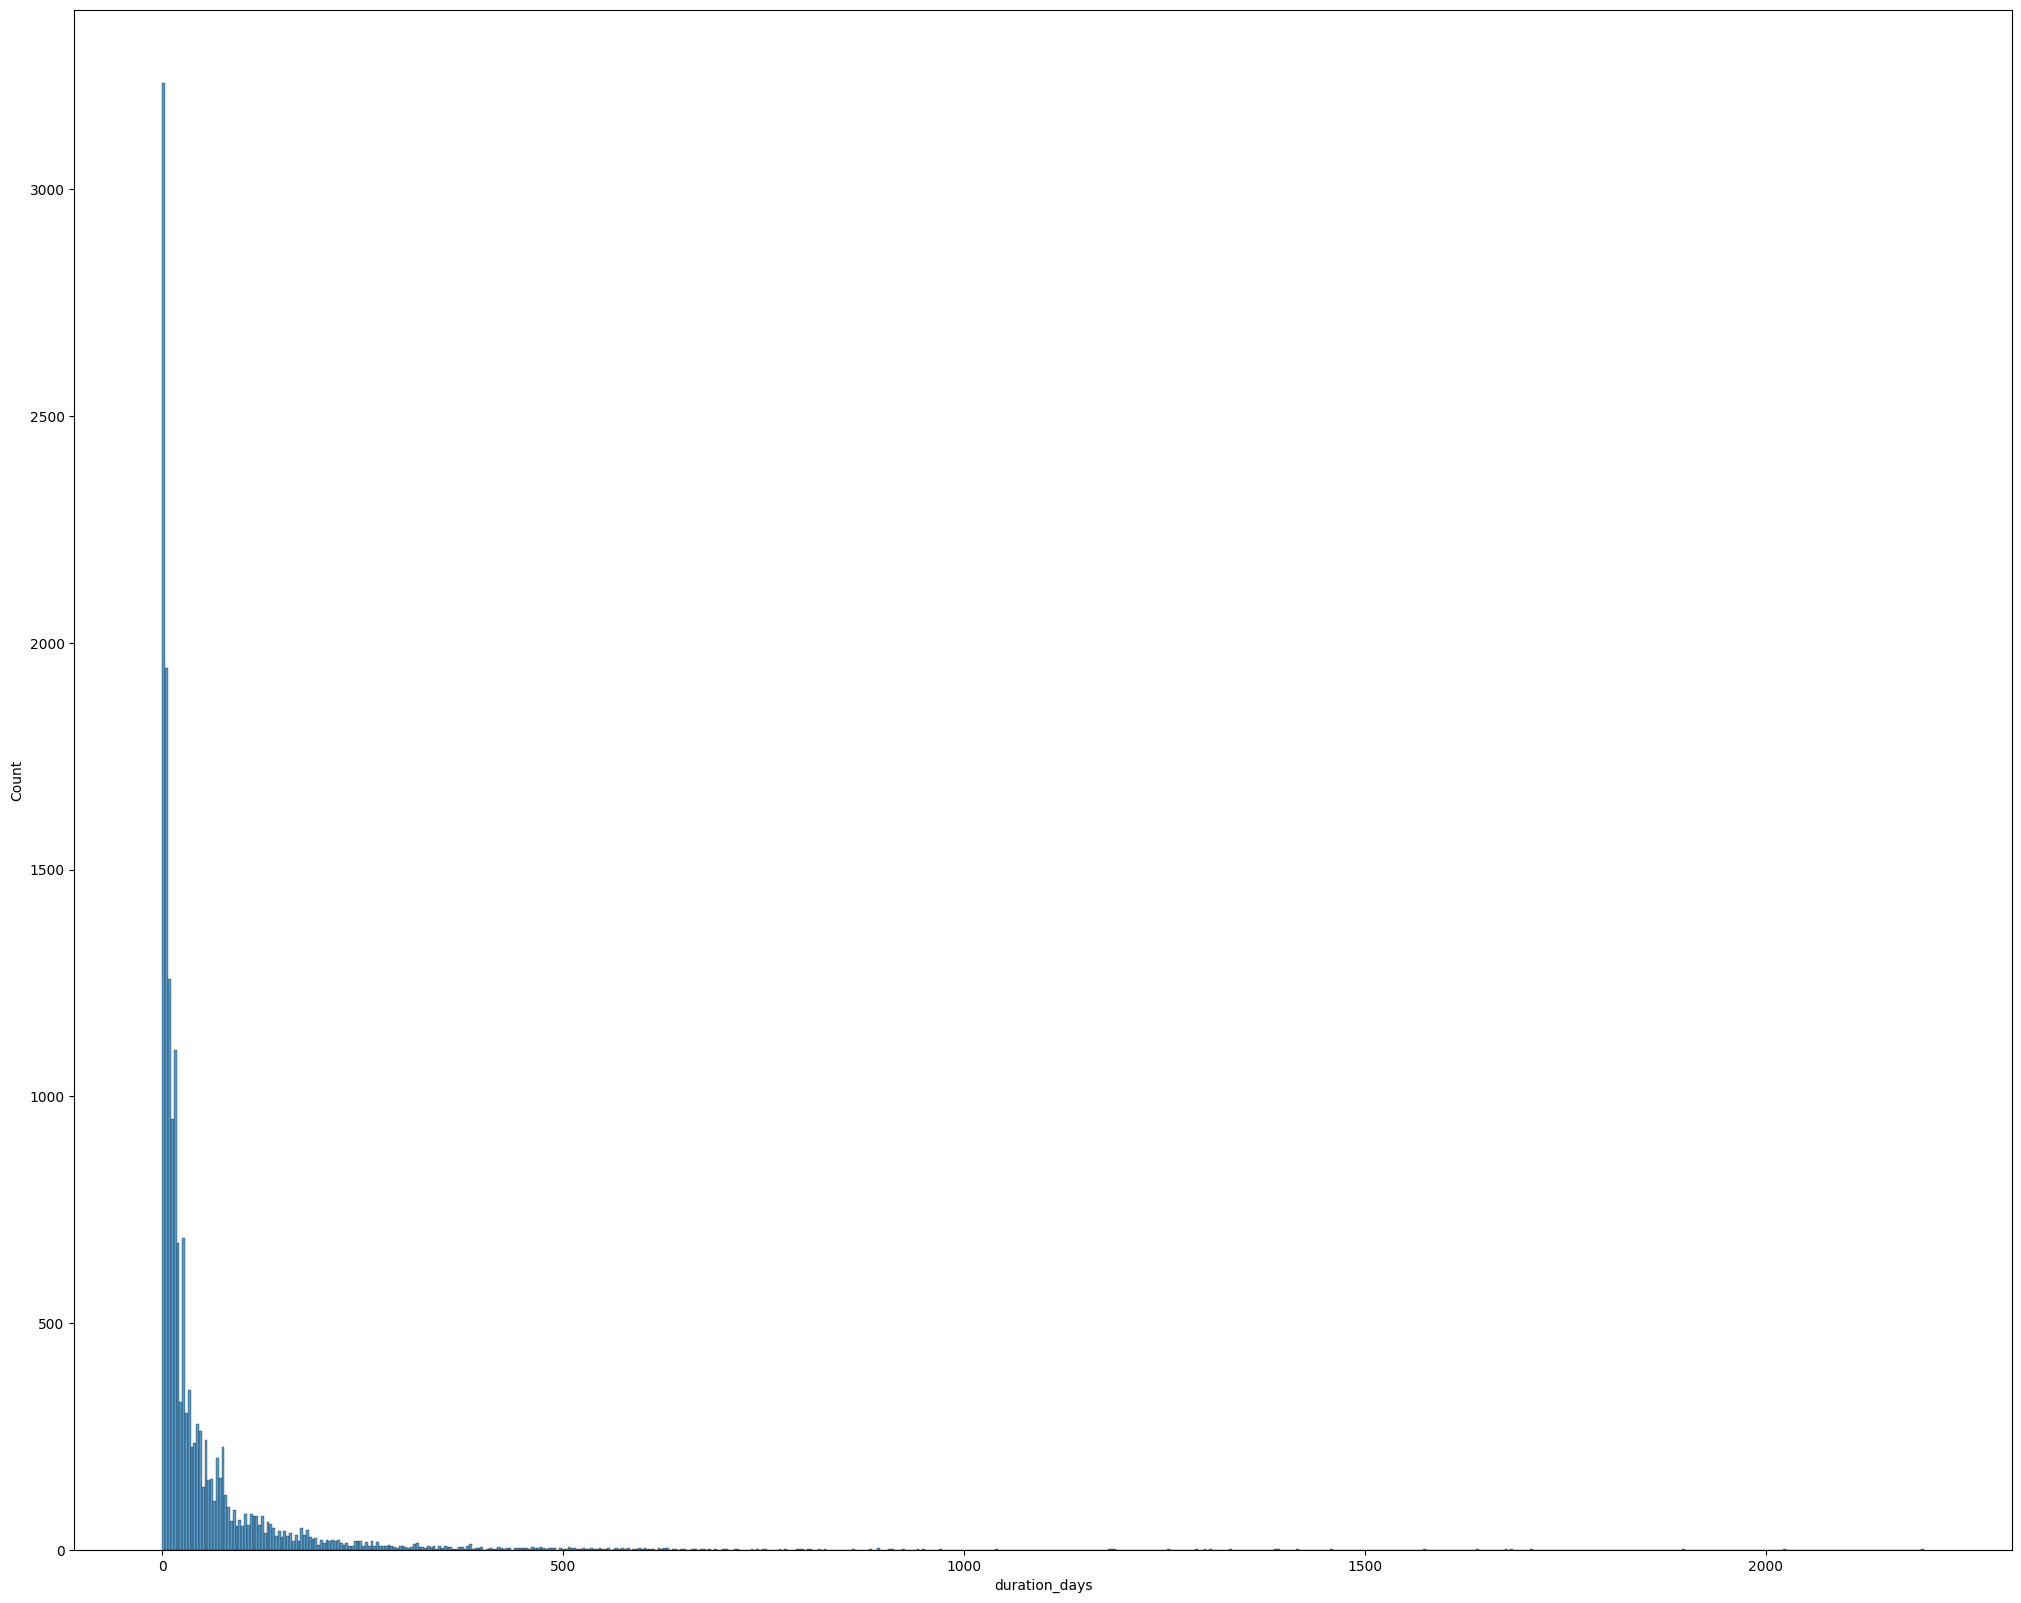

In [6]:
df= df.dropna(subset=['startdate', 'enddate'])

df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])

df['duration'] = df['enddate'] - df['startdate']
df['duration_days'] = df['duration'].dt.days

print(df[['startdate', 'enddate', 'duration_days']])
plt.subplots(figsize=(25, 20))
# plot with log-sclaed y-axis
sns.histplot(data=df, x="duration_days", log_scale=(False, False))# , bins=200)
# TODO cut after 2 years

## In welchen Stadteilen sind die Anzeigen wie lange Online?
vergleichbar mit dem Krankenhaus-Plot

## Sind Mietverträge länger online als Kaufverträge?


## Baujahrverteilung pro Stadtteil

In [ ]:
from date